In [2]:
import pandas as pd 
df=pd.read_csv("C:\\Users\\rawat\\Downloads\\spam.csv",encoding="latin1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
915,ham,I could ask carlos if we could get more if any...
3082,ham,K..k:)how about your training process?
3628,ham,Should I head straight there or what
467,ham,When are you going to ride your bike?
2920,ham,"Yo, any way we could pick something up tonight?"


In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.isna().sum()

target    0
text      0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

In [16]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [17]:
#eda
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

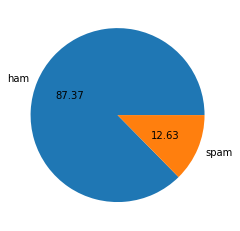

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
#lots of ham in data compared to spam

In [20]:
import nltk

In [21]:
df['num_characters'] = df['text'].apply(len)

C:\Users\rawat\AppData\Local\Temp/ipykernel_8552/253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\rawat\AppData\Local\Temp/ipykernel_8552/2894533858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\rawat\AppData\Local\Temp/ipykernel_8552/2977430178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
#average num of characters, num of words and num of sentences are lesser in ham as compared to spam

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

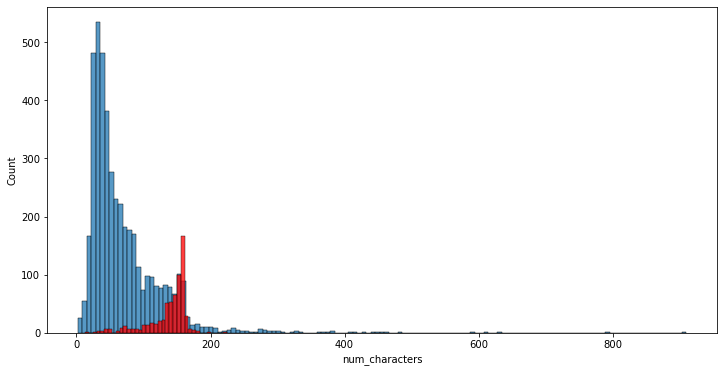

In [29]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

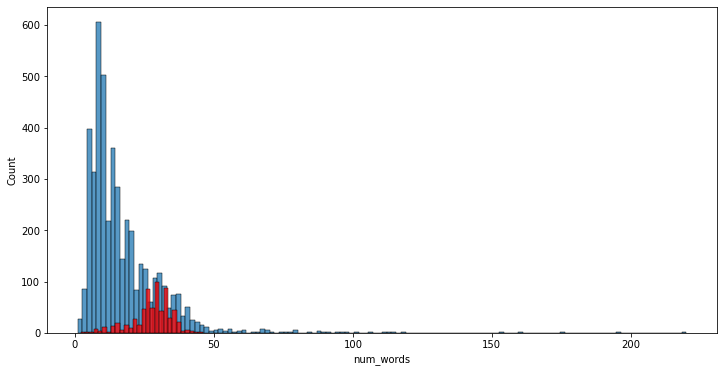

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<AxesSubplot:>

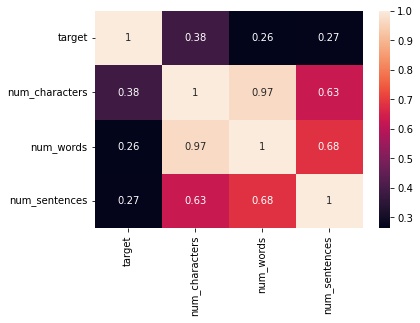

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
#PREPROCESSING:
#Lowercase [all lowercase]
#Tokenization [creating tokens of words]
#Removing special characters [!,@,# etc]
#Removing stop words and punctuation [and,or etc]
#Stemming
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def prepro_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    x=[]
    for i in text:
        if i.isalnum:
            x.append(i)
            
    text=x[:]
    x.clear()
                
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
            
    text = x[:]
    x.clear()
    
    for i in text:
        x.append(ps.stem(i))
    
            
    return " ".join(x)

In [34]:
prepro_text("HI, whatsup!! PIYUSH here and how about you")

'hi whatsup piyush'

In [35]:
df['transformed_text'] = df['text'].apply(prepro_text)

C:\Users\rawat\AppData\Local\Temp/ipykernel_8552/3794197698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(prepro_text)


In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\rawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


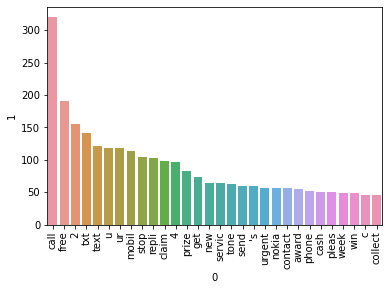

In [38]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\rawat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


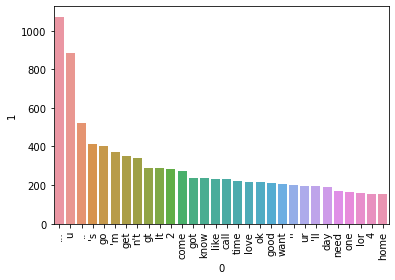

In [39]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
#modelling
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
print(X)
X.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(5169, 3000)

In [43]:
y = df['target'].values
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred1))
print("conf. matrix:",confusion_matrix(y_test,y_pred1))
print("pr. scr:",precision_score(y_test,y_pred1))

accuracy: 0.8781431334622823
conf. matrix: [[790 106]
 [ 20 118]]
pr. scr: 0.5267857142857143


In [55]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred2))
print("conf. matrix:",confusion_matrix(y_test,y_pred2))
print("pr. scr:",precision_score(y_test,y_pred2))

accuracy: 0.9748549323017408
conf. matrix: [[896   0]
 [ 26 112]]
pr. scr: 1.0


In [56]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy:",accuracy_score(y_test,y_pred3))
print("conf. matrix:",confusion_matrix(y_test,y_pred3))
print("pr. scr:",precision_score(y_test,y_pred3))

accuracy: 0.988394584139265
conf. matrix: [[896   0]
 [ 12 126]]
pr. scr: 1.0


In [58]:
#checking other algos wrt same dataset
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [79]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [62]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [63]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.83
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9523809523809523
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9729206963249516
Precision -  0.9583333333333334
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8444444444444444
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
print(performance_df)

  Algorithm  Accuracy  Precision
1        KN  0.904255   1.000000
2        NB  0.974855   1.000000
5        RF  0.975822   0.982906
8       ETC  0.980658   0.975806
0       SVC  0.977756   0.975207
6  AdaBoost  0.972921   0.958333
4        LR  0.958414   0.952381
9      GBDT  0.949710   0.938776
7       BgC  0.956480   0.844444
3        DT  0.930368   0.830000


In [76]:
# Sample message for testing
sample_message = "Congratulations! You've won a free vacation to a tropical paradise. Click here to claim your prize!"

# Preprocess the sample message
processed_message = prepro_text(sample_message)

# Transform the processed message using the same vectorizer that you used during training
message_vec = tfidf.transform([processed_message]).toarray()

# Make a prediction using the SVM model instance
prediction = svc.predict(message_vec)

# Print the predicted class
print("Predicted class:", 'Spam' if prediction[0] == 1 else 'Ham')



Predicted class: Spam


In [80]:
combined_check = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'BNB':bnb
}

In [82]:
# Sample message for testing
sample_message = "Congratulations! You've won a free vacation to a tropical paradise. Click here to claim your prize!"

# Preprocess the sample message
processed_message = prepro_text(sample_message)

# Transform the processed message using the same TF-IDF vectorizer
message_vec = tfidf.transform([processed_message]).toarray()

# Loop through models for testing
for model_name, model in combined_check.items():
    prediction = model.predict(message_vec)
    print(f"Model: {model_name}, Predicted class: {'Spam' if prediction[0] == 1 else 'Ham'}")


Model: SVC, Predicted class: Spam
Model: KN, Predicted class: Ham
Model: NB, Predicted class: Spam
Model: DT, Predicted class: Ham
Model: LR, Predicted class: Spam
Model: RF, Predicted class: Spam
Model: AdaBoost, Predicted class: Spam
Model: BgC, Predicted class: Spam
Model: ETC, Predicted class: Spam
Model: GBDT, Predicted class: Ham
Model: BNB, Predicted class: Spam


In [83]:
#so the given message was a span message and we can see how models predicted it
#in the same way we can do check for others message too